# Solar power in a nuclear winter

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM

First we load the Global Energy Monitor data.

In [2]:
gem = GEM()

We make a quick check to make sure the data makes sense. I am comparing the total *operating* solar capacity to reference values below. It all looks ok. It's normal to have somewhat lower numbers because the database I'm using only has utility-scale farms (so that does not include roof-top solar panels on residential buildings for instance).

In [3]:
gem.sum_operating_farms_per_country(energy="solar")

Country
China            294195.6
United States     79363.5
Germany           63128.5
India             53114.3
Italy             20345.0
Name: Capacity (MW), dtype: float64

* China 2023, total: 392 GW (https://en.wikipedia.org/wiki/Solar_power_in_China)
* US 2023, utility scale: 73.5 GW (https://www.eia.gov/todayinenergy/detail.php?id=55719)
* Germany 2022, total: 81.8 GW (https://en.wikipedia.org/wiki/Solar_power_in_Germany)
* India 2023, total: 66.8 GW (https://en.wikipedia.org/wiki/Solar_power_in_India)
* Italy 2022, total: 22.6 GW (https://en.wikipedia.org/wiki/Solar_power_in_Italy)

As another sanity check, we can look at the spatial distribution of solar farms (note that this also includes planned farms).

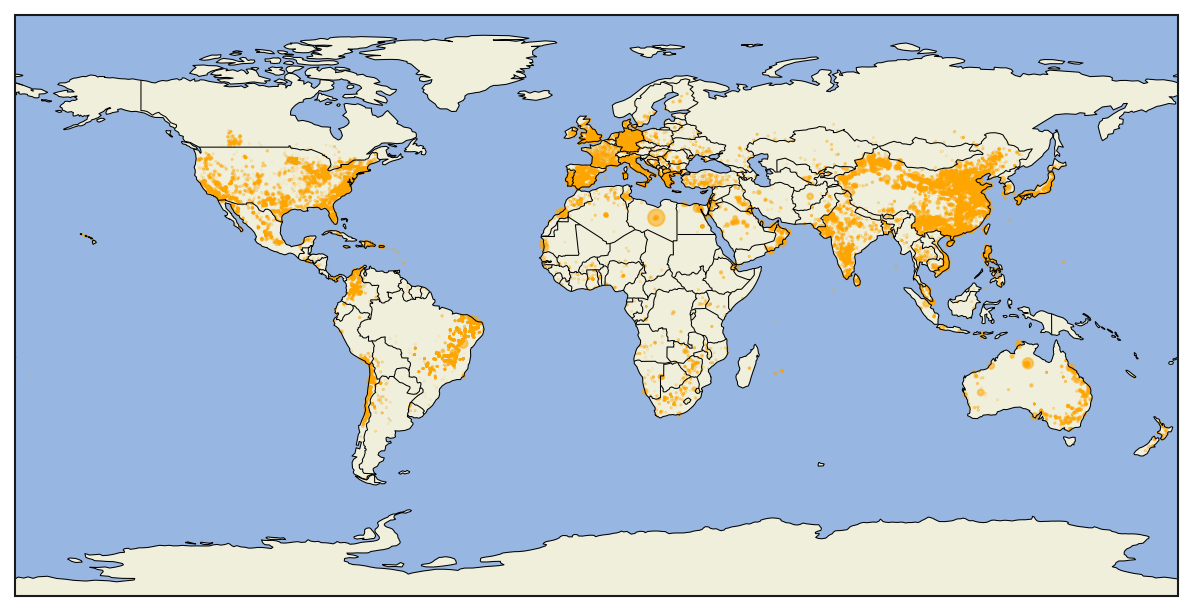

In [4]:
gem.plot_farm_map(energy="solar")

And now we do the *real* calculations. We query the climate model data for every solar farm in the database. That gives us a curve of the fraction of sunlight received by that farm as a function of time during a nuclear winter. We then repeat this over all farms of a given country, to get the average change in solar power for that country (we weight each farm by its power capacity). Finally, we repeat this process for all countries. This is all written out in a csv file.

In [16]:
df = gem.generate_random_locations("Norway", 50)
import folium
import pandas as pd

norway_center = [60.472, 8.468]
my_map = folium.Map(location=switzerland_center, zoom_start=7)

# Add markers
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Capacity: {row['Capacity (MW)']} MW"
    ).add_to(my_map)

# Save the map
my_map


/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:228: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:240: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [15]:
gem.get_all_country_time_series(energy="solar")

Processing Côte d'Ivoire...


100%|██████████| 11/11 [00:09<00:00,  1.19it/s]


Saved Côte d'Ivoire to ../results/fraction_of_solar_power_countries.csv
Saved Côte d'Ivoire to ../results/baseline_seasonality_solar_power_countries.csv
Processing Cote d'Ivoire...


/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:228: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:240: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
100%|██████████| 100/100 [01:08<00:00,  1.45it/s]


Saved Cote d'Ivoire to ../results/fraction_of_solar_power_countries.csv
Saved Cote d'Ivoire to ../results/baseline_seasonality_solar_power_countries.csv
Processing Norway...


/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:228: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:240: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
100%|██████████| 100/100 [01:11<00:00,  1.39it/s]


Saved Norway to ../results/fraction_of_solar_power_countries.csv
Saved Norway to ../results/baseline_seasonality_solar_power_countries.csv


Let's produce some high-level insights from these results now saved as CSV files.

This is a figure of the average solar power at locations across the world that have active or planned solar farms. Comparing to the average solar flux figure of the `Explore.ipynb` reveals a very similar shape, which of course makes sense. Remember that this is comparing to a seasonally adjusted baseline for each country. So when this curve levels off to 1 at the end, it does not mean that solar power stays constant, but rather that it follows its normal seasonal variations.

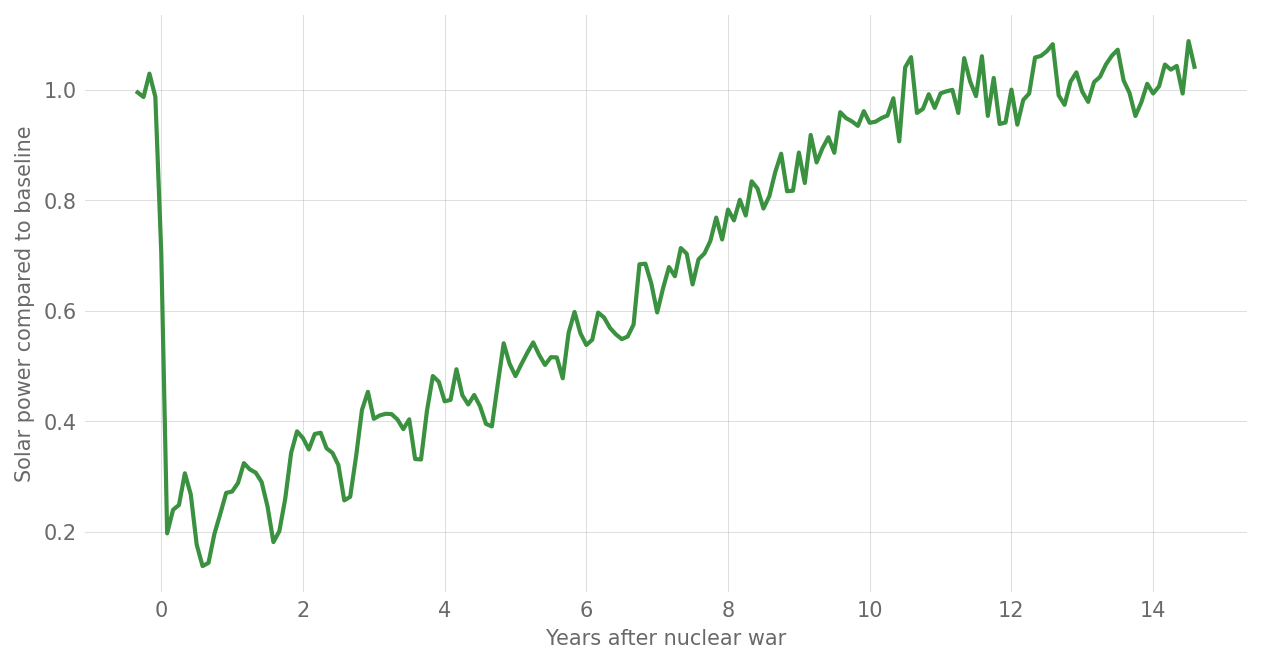

In [10]:
gem.postprocess_aggregate_countries(
    "../results/fraction_of_solar_power_countries.csv", energy="solar"
)

/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:602: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  fig, ax = plt.subplots(1, 1, figsize=(15, 10))
/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:602: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  fig, ax = plt.subplots(1, 1, figsize=(15, 10))
/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:602: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  fig

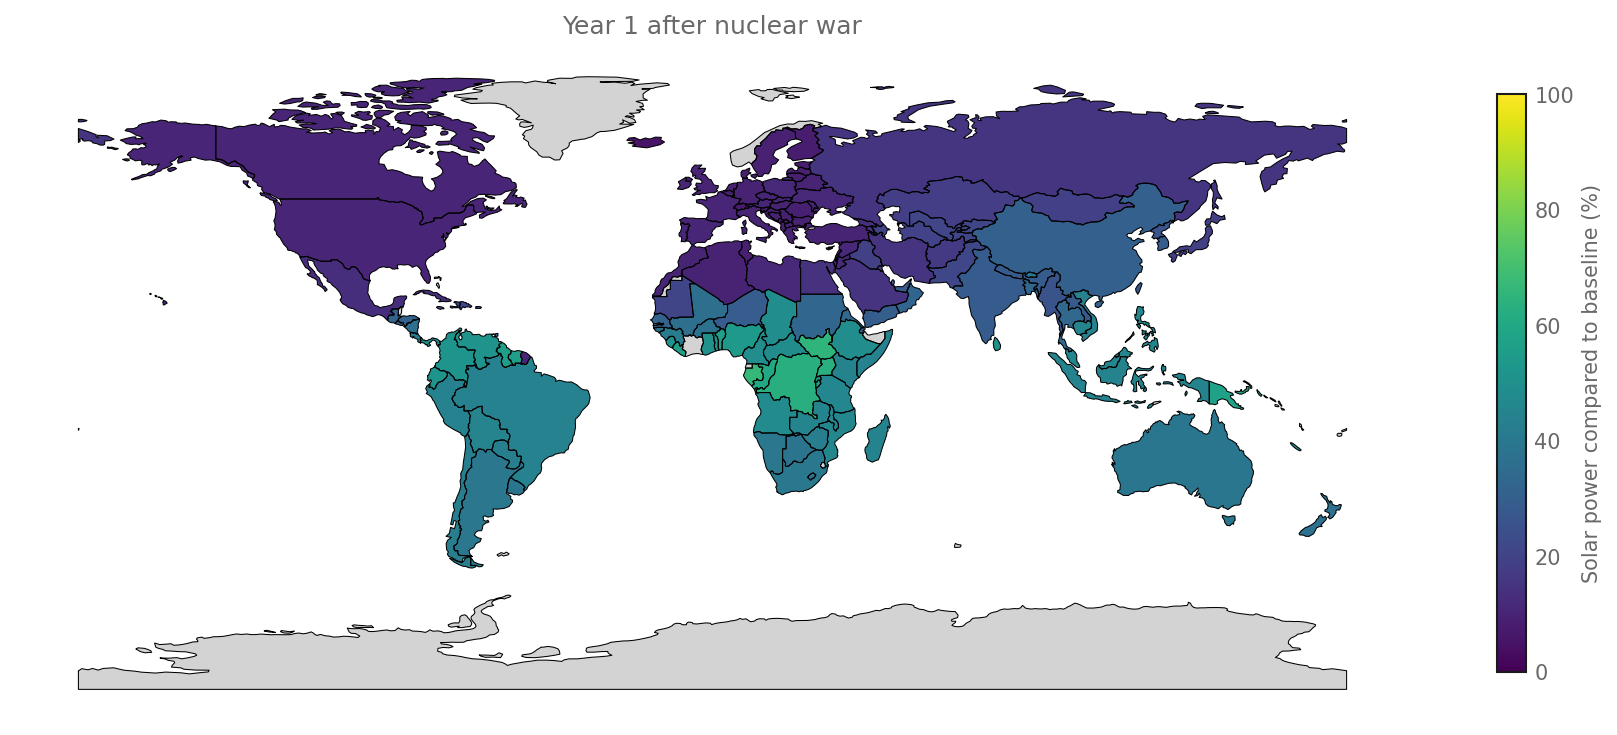

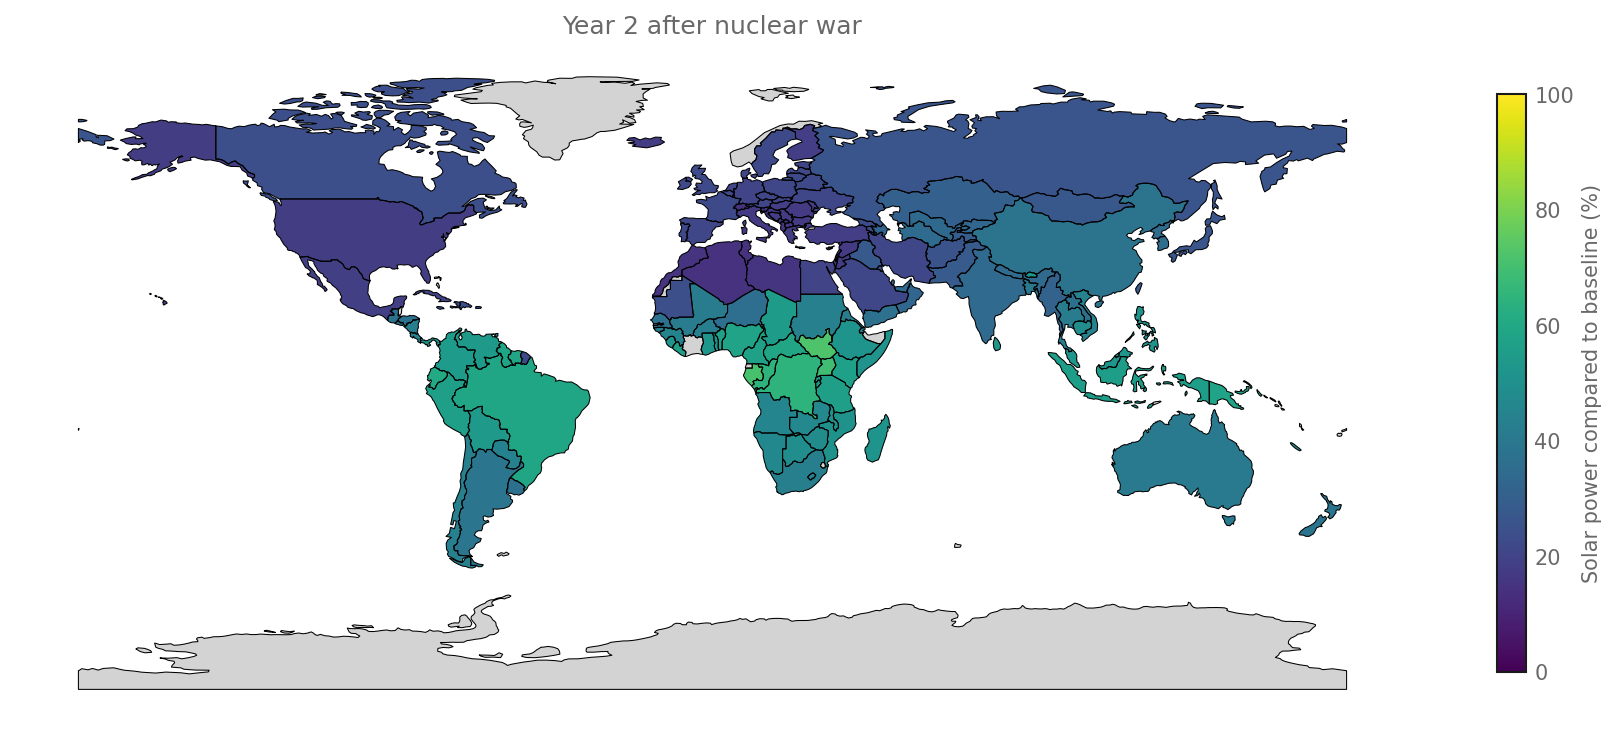

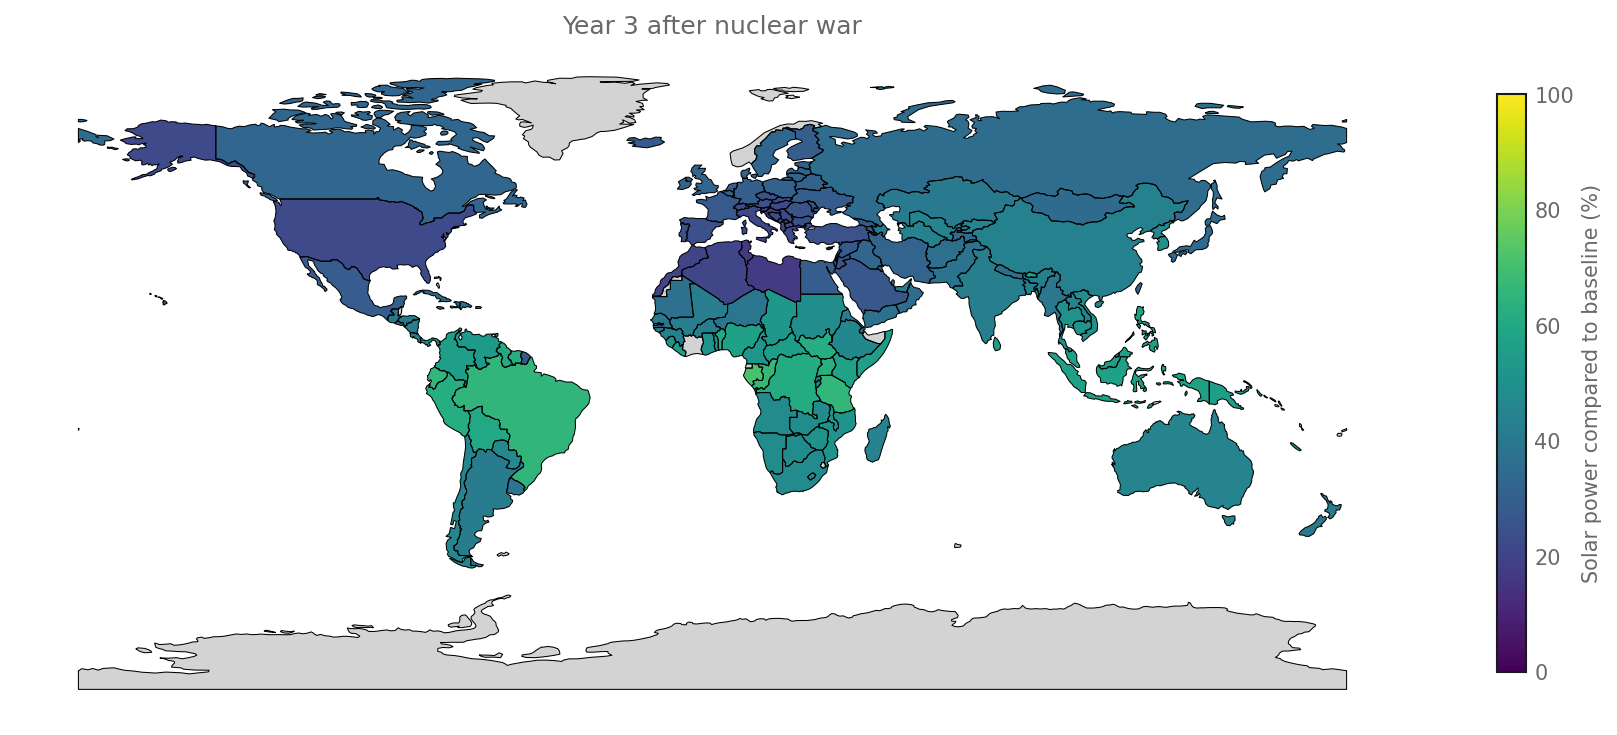

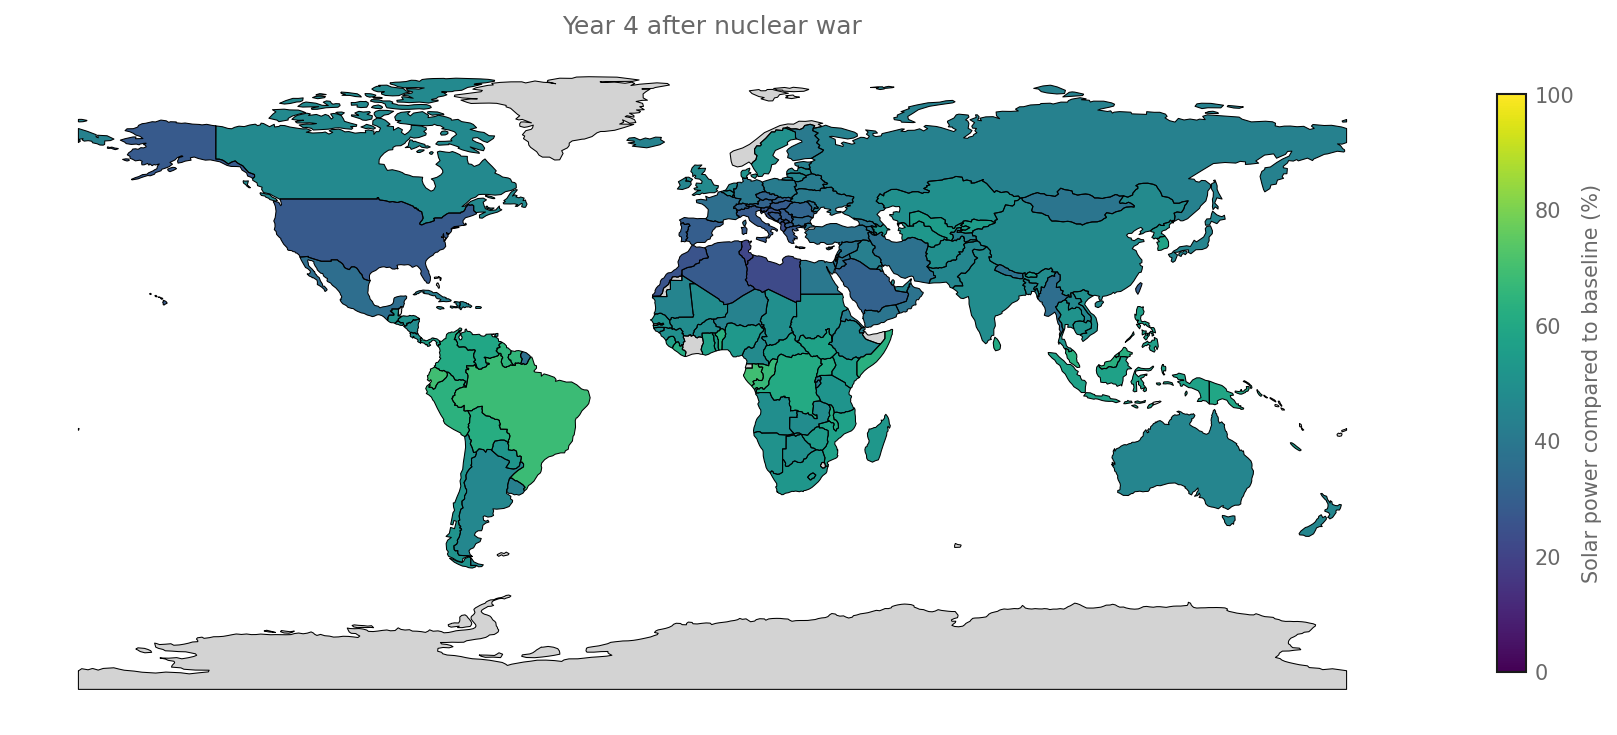

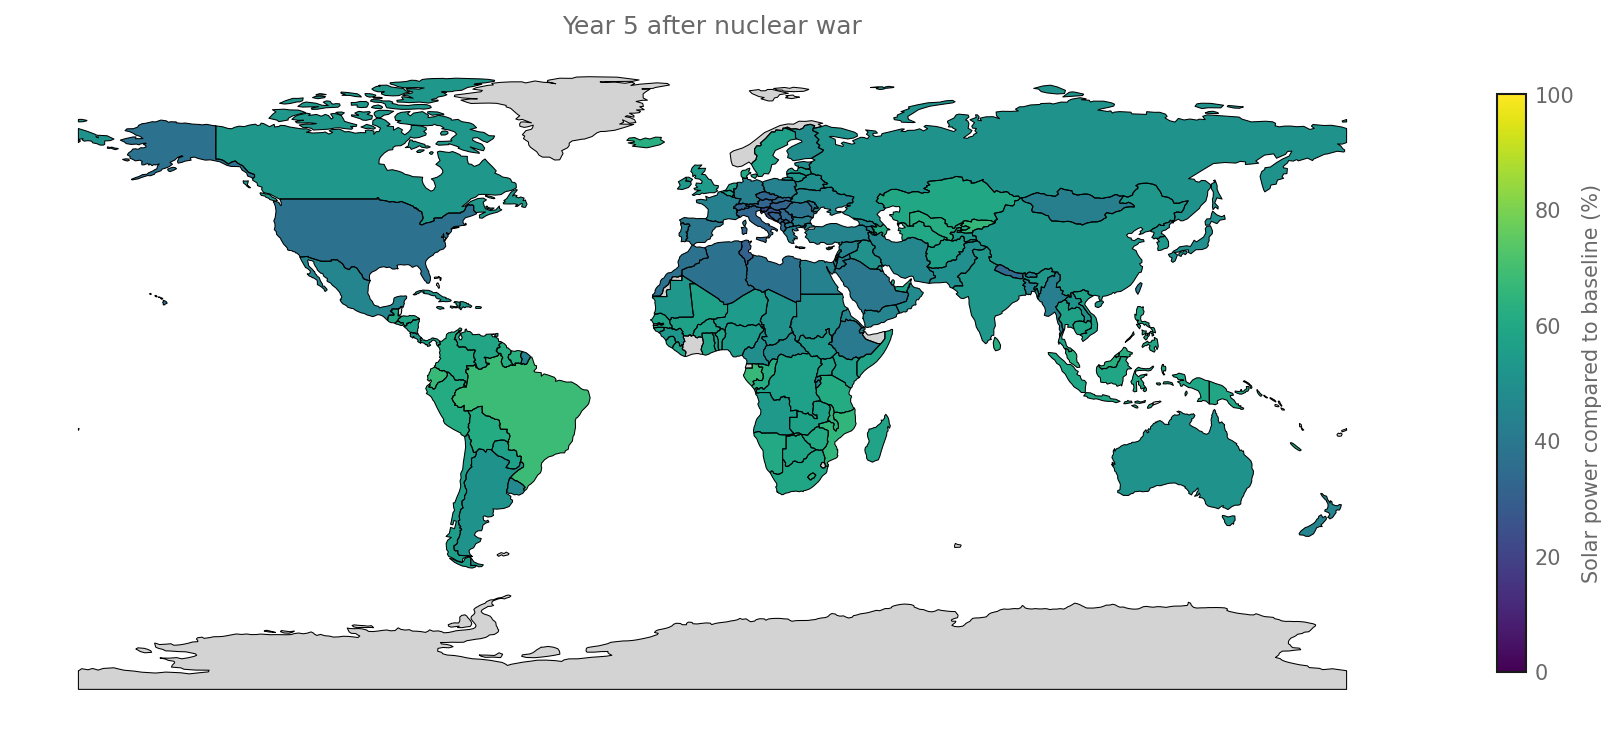

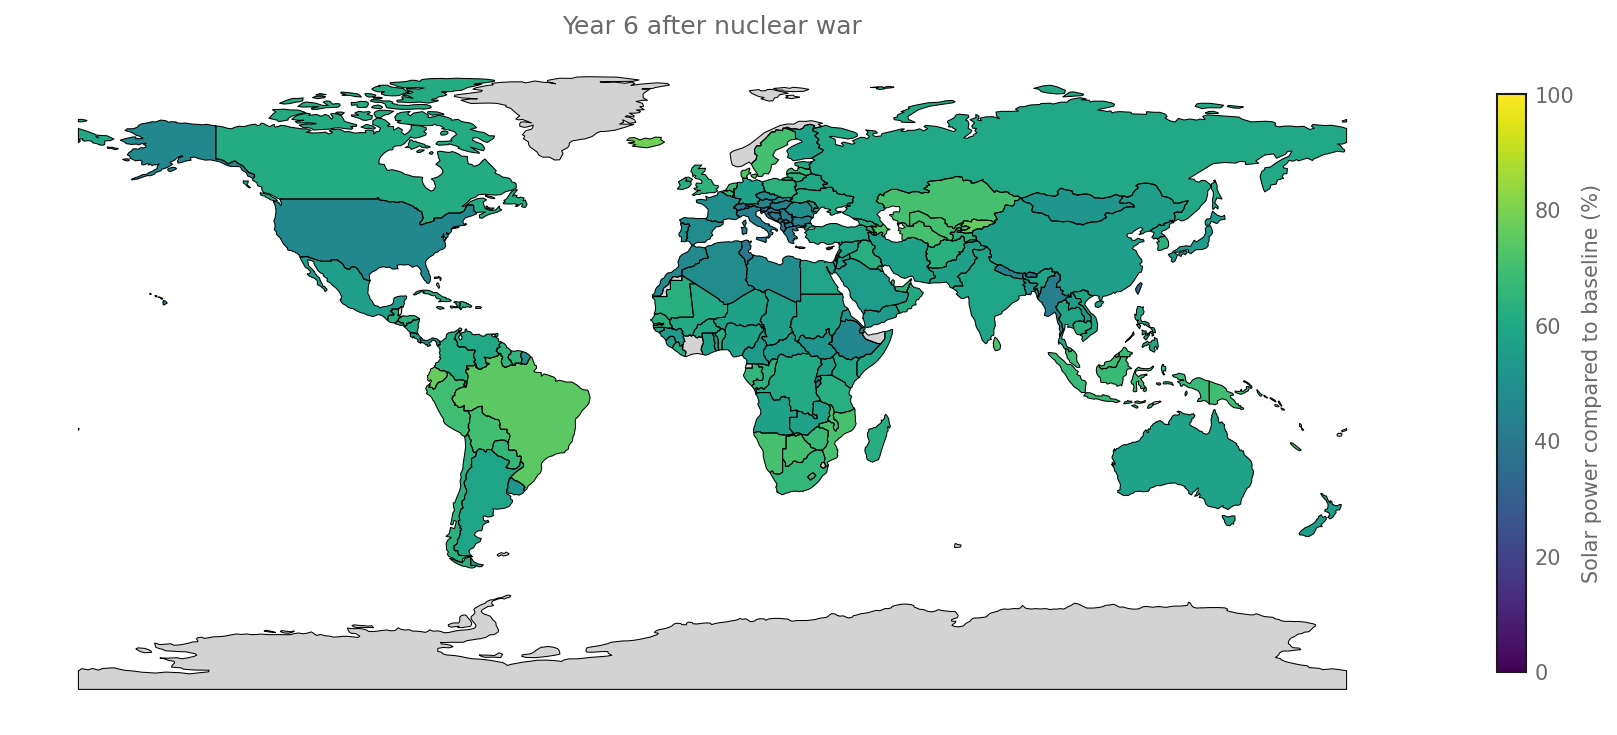

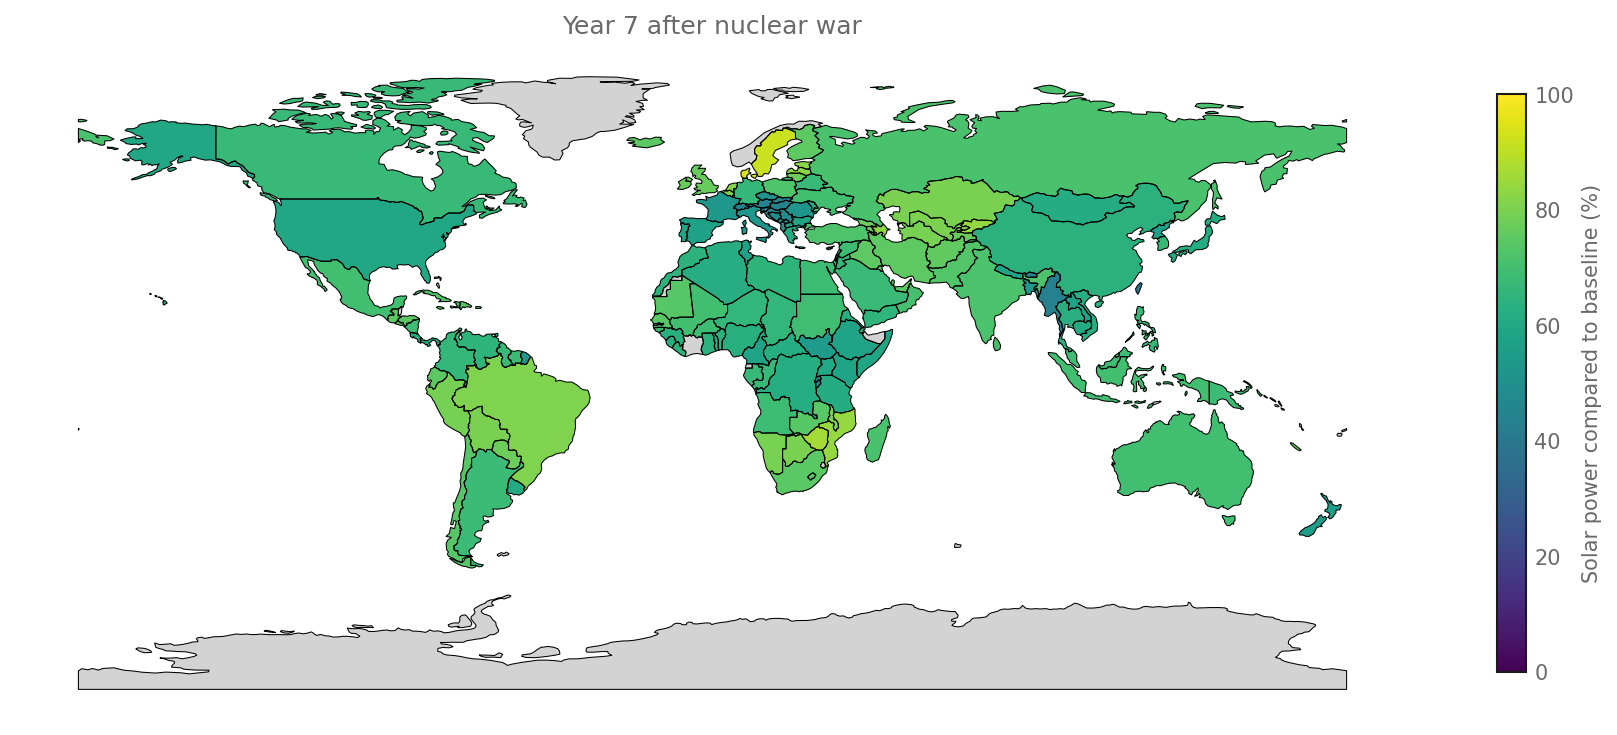

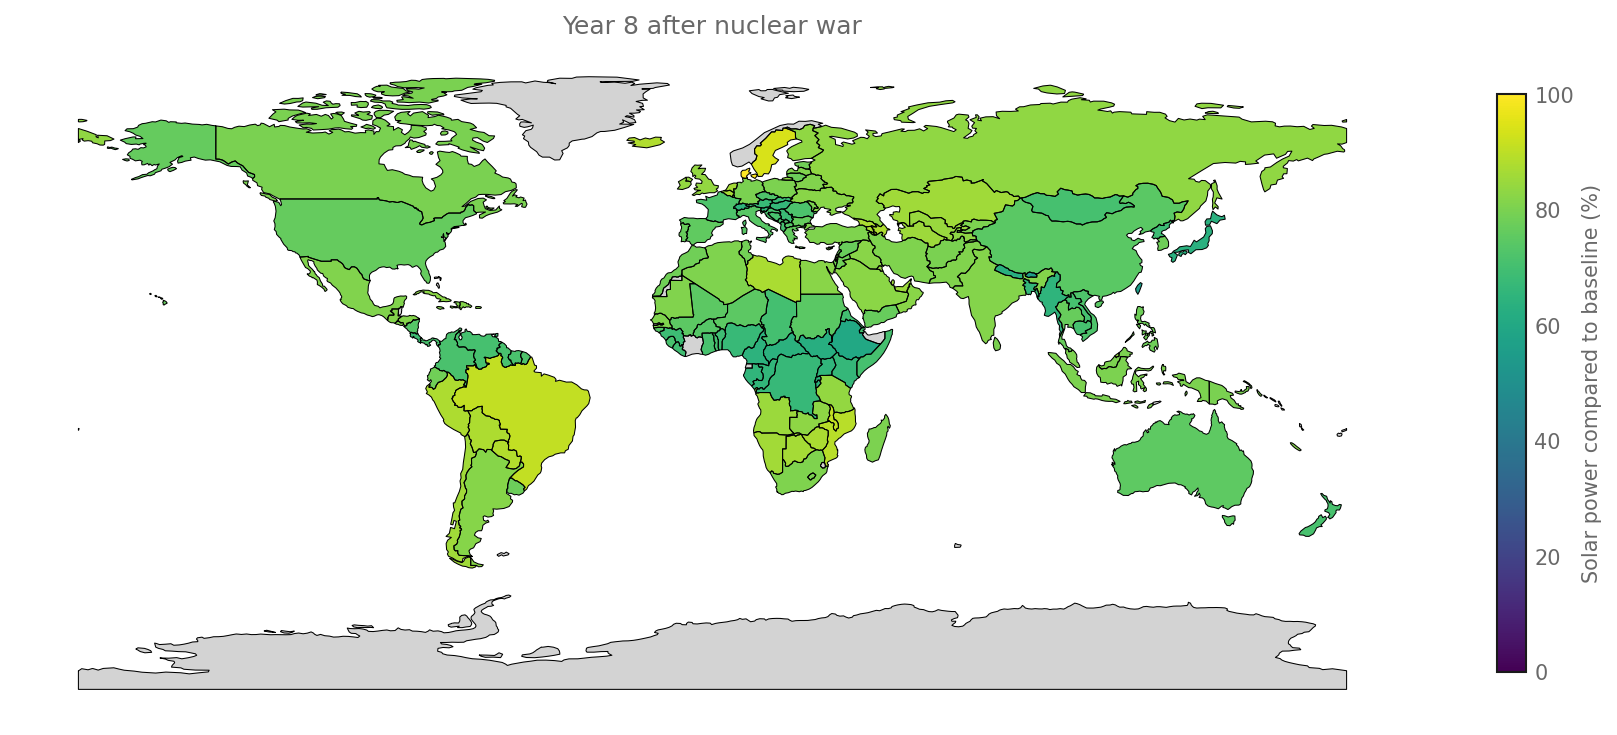

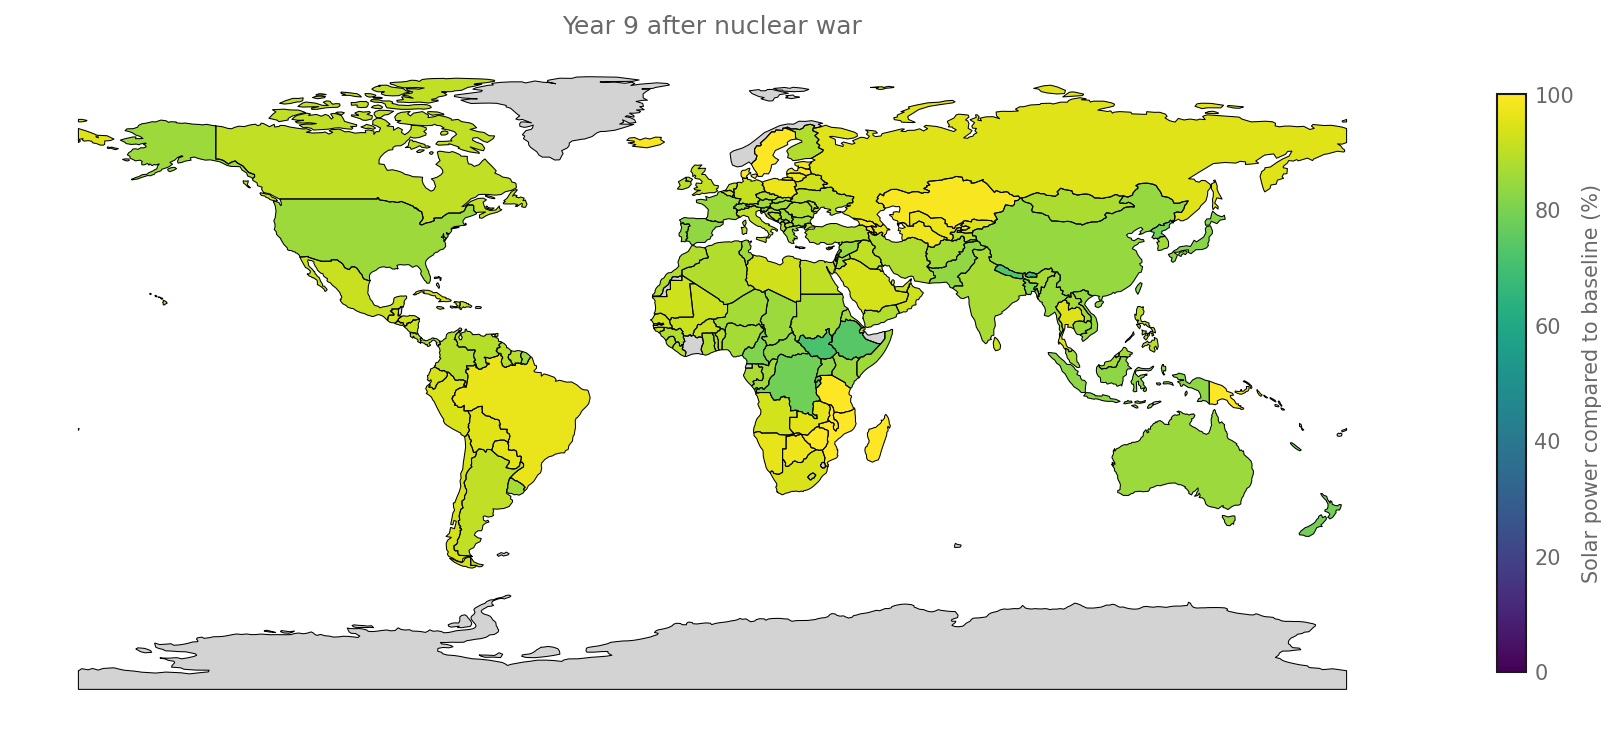

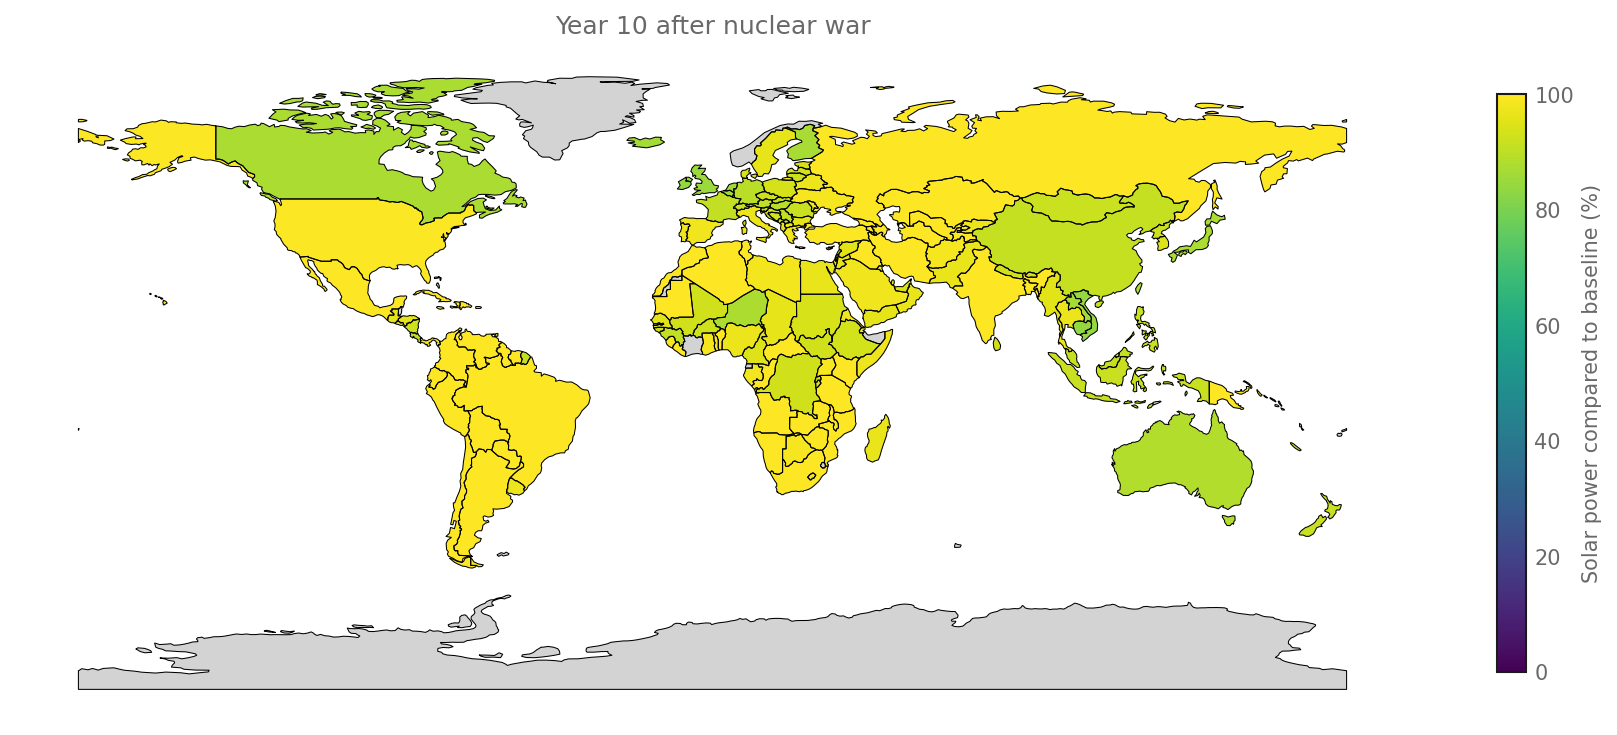

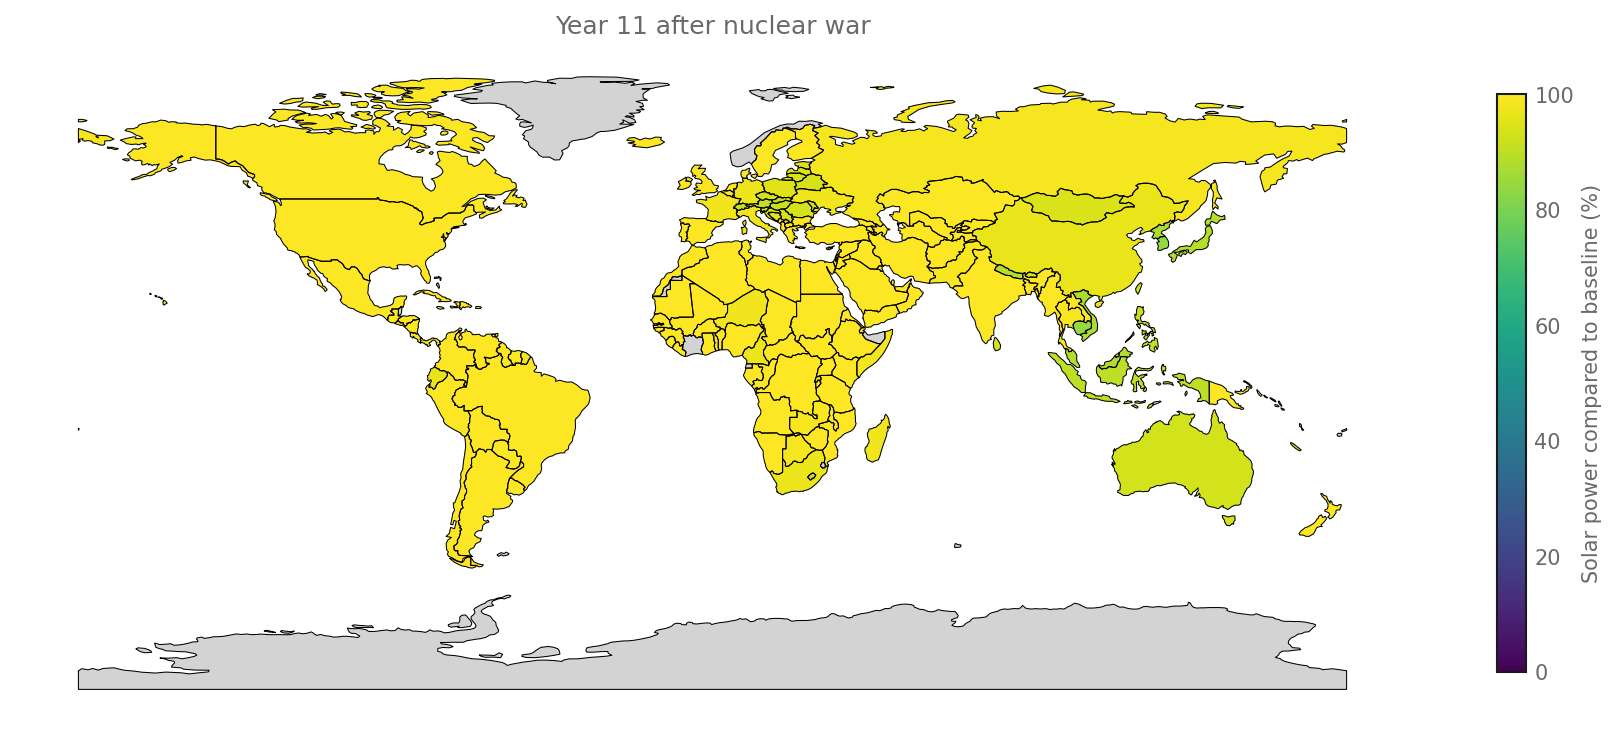

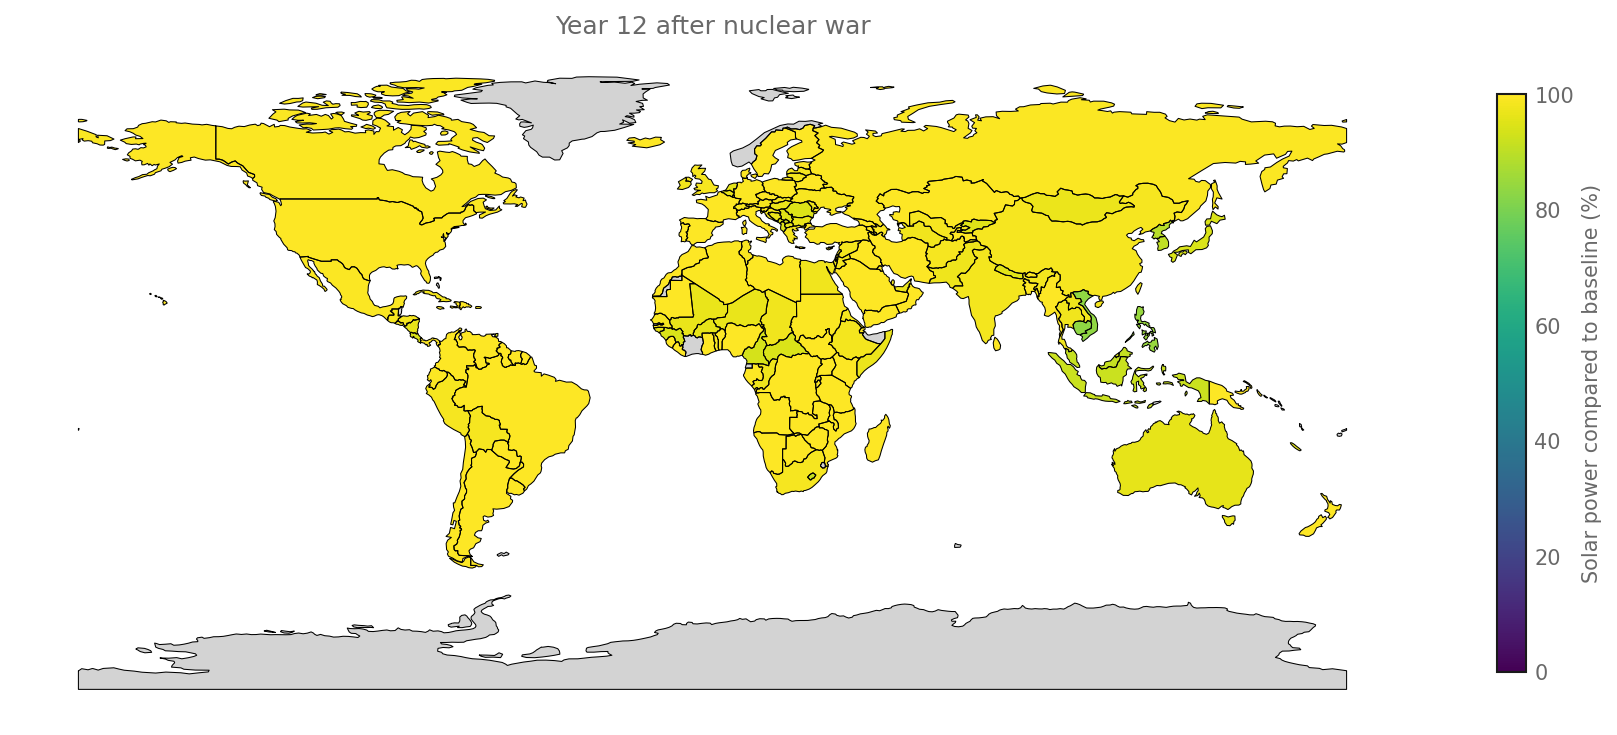

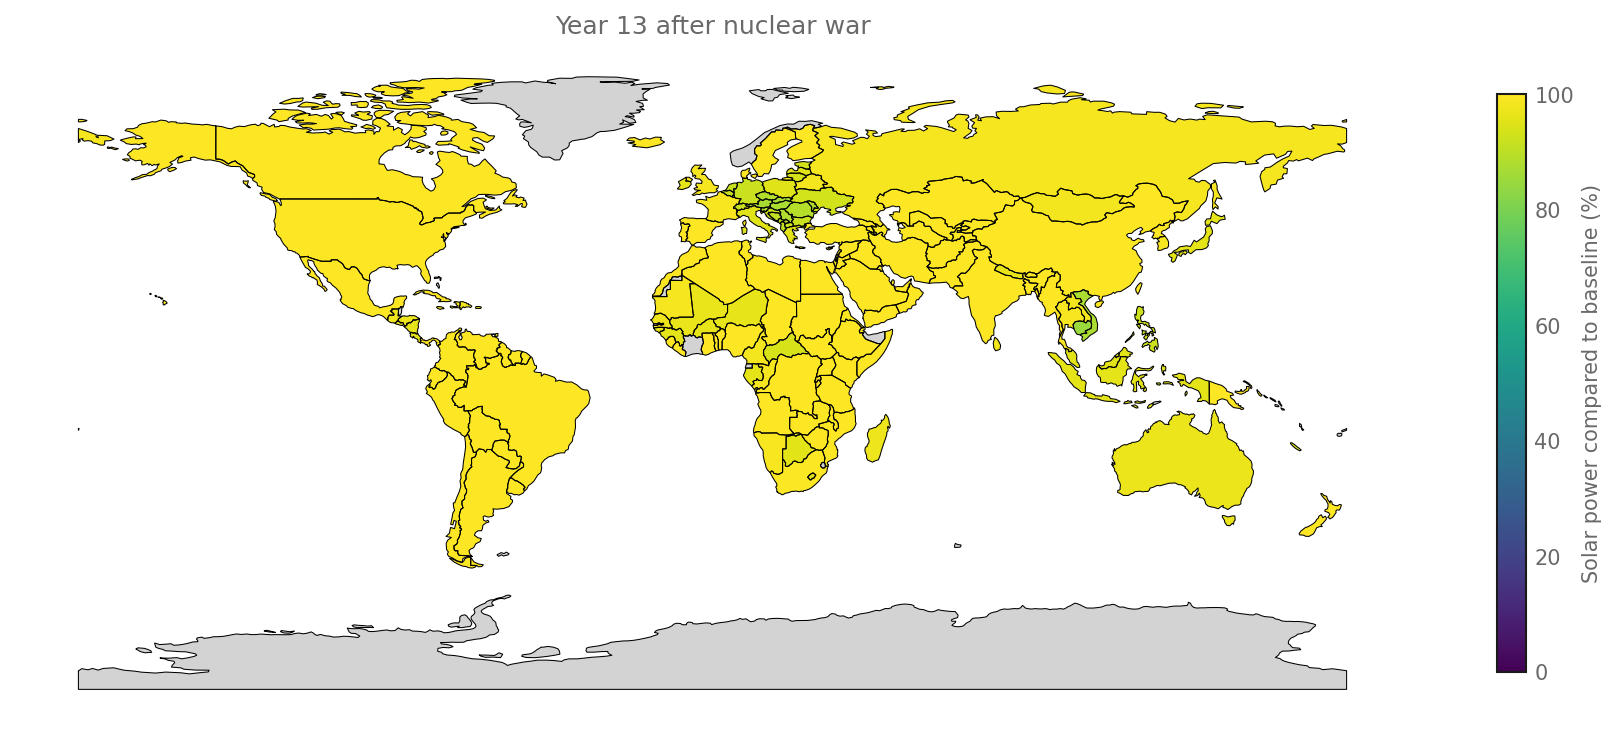

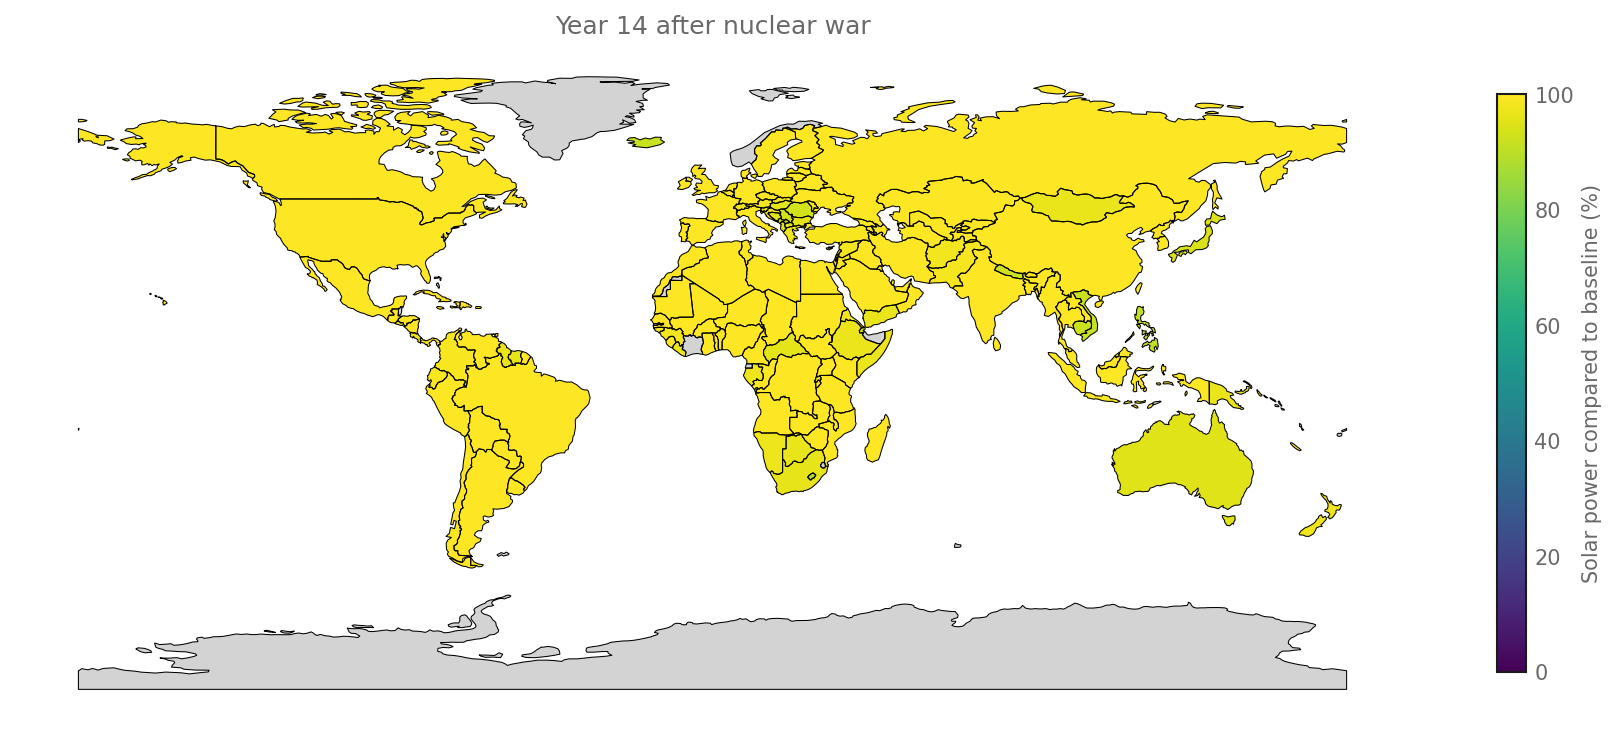

In [14]:
gem.postprocess_country_map(
    fraction_csv_file="../results/fraction_of_solar_power_countries.csv",
    baseline_csv_file="../results/baseline_seasonality_solar_power_countries.csv",
    energy="solar",
    zmin=0,
    zmax=100,
)

In [28]:
gem.postprocess_aggregate_yearly(
    fraction_csv="../results/fraction_of_solar_power_countries.csv",
    baseline_csv="../results/baseline_seasonality_solar_power_countries.csv",
    energy="solar",
)

/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:508: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, new_row], ignore_index=True)
